In [1]:

from textblob import TextBlob
from twython import Twython
from tkinter import *
from PIL import ImageTk,Image 
import os
import pandas as pd
import tkinter as tk
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
def getFileName(image):
    print (str(image))

def show_img():
    for images in os.listdir(os.getcwd()):
        
        if images.endswith("png"):
            im = Image.open(images)
            tkimage = ImageTk.PhotoImage(im)
            handler = lambda img = images: getFileName(img)  
            imageButton = Button(frame, image=tkimage, command=handler)
            imageButton.image=tkimage
            imageButton.pack(side='left')

In [3]:
def get_tweet_sentiment(tweet):
    
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [4]:
def get_plot(candidate, text, sentiment):
    df = pd.DataFrame()
    df['text'] = text
    df['sentiment'] = sentiment
    
    pl = df['sentiment'].value_counts().plot(kind='bar', title=candidate)
    fig = pl.get_figure()
    fig.savefig(candidate + '.png')

In [5]:
def get_tweet(q):
    app_key = 'bdKaYkyCcSmf9f6Wfqj8VvIuR'
    app_secret = '1S1WMaZJxdIFyiniKjDeLFCBDRPP72bx2HCxI2cwMTx0Y7bYOy'
    oauth_token = '786603866498269184-DSnfKXCZhYNRUjboLDwHWaZ7InaFslf'
    oauth_token_secret = 'QDRQK2huoL8hpo3MvaqrNdrGtvWWxCd6sCCI8B0X95v8y'
    
    try:
        t = Twython(app_key=app_key, app_secret=app_secret, oauth_token=oauth_token, oauth_token_secret=oauth_token_secret)
        search =t.search(q=q,count=1000)
        fetched_tweets = search['statuses']
        text=[]
        for i in fetched_tweets:
            text.append(i.get('text'))
        sentiment=[]
        for tweet in text:
            sentiment.append(get_tweet_sentiment(tweet))

    except:
        print("error")
        
    
    ptweets = [tweet for tweet in sentiment if tweet == 'positive']
    ntweets = [tweet for tweet in sentiment if tweet == 'negative']
    
    positive_tweet=int(100*len(ptweets)/len(sentiment))
    negative_tweets=int(100*len(ntweets)/len(sentiment))
    neutral_tweets=int(100*(len(sentiment) - len(ntweets) - len(ptweets))/len(sentiment))
    
    get_plot(q, text, sentiment)


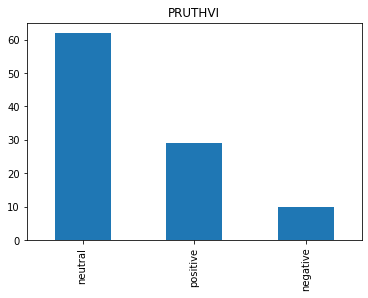

In [6]:
root = tk.Tk()
root.title("Sentiment Analysis to Predict Election Results")
HEIGHT = 740
WIDTH = 1640


canvas = Canvas(root, height=HEIGHT, width=WIDTH)
canvas.pack()

frame = Frame(root, bg='#00ffff')
frame.place(relx=0.1, rely=0.1, relwidth=0.8, relheight=0.8)

greet = Label(frame, text="Enter the Candidate names")
greet.config(font=("Calibri", 44))
greet.pack(fill='both')


fields = ('Candidate 1', 'Candidate 2', 'Candidate 3')



def display(root, fields):
    entries = []
    for field in fields:
        row = Frame(root, bg='#00ffff')
        lab = Label(row, width=40, text=field+": ", anchor='e', bg='#00ffff')
        lab.config(font=("Calibri", 18))
        ent = Entry(row)
        ent.config(font=("Calibri", 18))
    
        row.pack(side = TOP, fill = X, padx = 5 , pady = 5)
        lab.pack(side = LEFT)
        ent.pack(side = LEFT, expand = YES, ipady=5)
        
        entries.append((field, ent))
    return entries


def get_result(entries):
#     lab = Label(frame, width=69, text='Click to  Display Graphs', anchor='n', bg='#00ffff')
#     lab.pack()
    b2 = Button(frame, text='Display Graphs', command=show_img)
    b2.pack(padx=5, pady=5)
    for entry in entries:
        get_tweet(entry[1].get())

ents = display(frame, fields)
frame.bind('<Return>', (lambda event, e=ents: get_result(e)))

b1 = Button(frame, text = 'Get Result', command=(lambda e=ents: get_result(e)))
b1.pack(padx=5, pady=5)

# b2 = Button(frame, text='Display Graphs', command=show_img)
# b2.pack(padx=5, pady=5)

root.mainloop()